# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  0%|          | 0/43 [00:00<?, ?it/s]

[90, 83, 88, 89, 89, 89, 86, 88, 86, 89, 85, 89, 87]
2 chs: 90 entries
3 chs: 83 entries
4 chs: 88 entries
5 chs: 89 entries
6 chs: 89 entries
7 chs: 89 entries
8 chs: 86 entries
9 chs: 88 entries
10 chs: 86 entries
15 chs: 89 entries
20 chs: 85 entries
30 chs: 89 entries
40 chs: 87 entries
Dataset entries: 1079


 81%|████████▏ | 35/43 [00:04<00:01,  5.43it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:04<00:00,  7.01it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 28%|██▊       | 12/43 [00:00<00:01, 22.01it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 81%|████████▏ | 35/43 [00:03<00:00,  9.42it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:03<00:00, 11.42it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:04<00:00,  7.31it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 28%|██▊       | 12/43 [00:01<00:03,  9.86it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:05<00:01,  8.23it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:05<00:00,  8.97it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:06<00:00,  6.81it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]


sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['LassoLars', 'ElasticNetCV', 'LarsCV', 'Lasso', 'LassoCV'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fontSize = 32
    
    fig, axis = plt.subplots(2, figsize = (10, 10))
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Test error for Gain", fontsize = fontSize)
    axis[0].get_xaxis().set_visible(False)
    axis[0].yaxis.set_tick_params(labelsize = fontSize)
    axis[0].set_yticklabels(range(0, 4))
    axis[0].set_ylim(0, 3)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Test error for Loss", fontsize = fontSize)
    axis[1].xaxis.set_tick_params(labelsize = fontSize)
    axis[1].yaxis.set_tick_params(labelsize = fontSize)
    axis[1].set_xticklabels(strategyArray)
    axis[1].set_yticklabels(range(0, 4))
    axis[1].set_ylim(0, 3)

    #fig.text(0.053, 0.5, 'Erro Médio Absoluto (dB)', va='center', rotation='vertical', fontsize = 30)

    plt.gcf().subplots_adjust(bottom = 0.08)
    fig.savefig("../../graphs/perLink-{}amp.pdf".format(data.ampNumber), format = 'pdf', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
cvData = []
X, y = data.loadDataset()

for i in range(5):
    X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = i)
    cvData.append([X_train, X_test, y_train, y_test])
    
count = 1

In [6]:
from sklearn.linear_model import BayesianRidge

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(BayesianRidge())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("BR")
count += 1

[17.  0. 21.  0.] [17.67219401  0.67219401 22.3925369   0.24785494]
[17.  0. 23.  0.] [17.69086828  0.69086828 22.34496289  0.16615434]
[19.  2. 24.  3.] [17.68087708  0.68087708 22.41640048  0.51582271]
[17.  0. 19.  0.] [17.67201608  0.67201608 22.38058101  1.12181178]
[17.  0. 23.  2.] [17.69382856  0.69382856 22.41208177  1.2173187 ]


In [7]:
from sklearn.ensemble import RandomForestRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(RandomForestRegressor())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("RF")
count += 1

[17.  0. 21.  0.] [17.62227787  0.60833773 22.268934    0.24534552]
[17.  0. 23.  0.] [17.73369711  0.74915437 22.46949209  0.12456418]
[19.  2. 24.  3.] [17.75467076  0.74792959 22.59037442  0.53113164]
[17.  0. 19.  0.] [17.80843697  0.79113282 22.60149829  1.22317855]
[17.  0. 23.  2.] [17.64381013  0.62407129 22.46146382  1.24963467]


In [8]:
from sklearn.tree import DecisionTreeRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(DecisionTreeRegressor())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("DT")
count += 1

[17.  0. 21.  0.] [17.60655738  0.60655738 22.24590164  0.24590164]
[17.  0. 23.  0.] [17.74193548  0.74193548 22.48387097  0.12903226]
[19.  2. 24.  3.] [17.75        0.75       22.56666667  0.51666667]
[17.  0. 19.  0.] [17.77777778  0.77777778 22.55555556  1.2037037 ]
[17.  0. 23.  2.] [17.63492063  0.63492063 22.44444444  1.23809524]


In [9]:
from sklearn.linear_model import LassoCV

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(LassoCV())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("LCV")
count += 1

[17.  0. 21.  0.] [17.67329193  0.67329193 22.39378882  0.26301334]
[17.  0. 23.  0.] [17.69068323  0.69068323 22.34534161  0.2567519 ]
[19.  2. 24.  3.] [17.68074534  0.68074534 22.41614907  0.51666667]
[17.  0. 19.  0.] [17.67204969  0.67204969 22.38136646  1.15358823]
[17.  0. 23.  2.] [17.6931677   0.6931677  22.41242236  1.17816481]


In [10]:
from sklearn.dummy import DummyRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(DummyRegressor())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])
    
    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("SM")
count += 1

[17.  0. 21.  0.] [17.67329193  0.67329193 22.39378882  0.73167702]
[17.  0. 23.  0.] [17.69068323  0.69068323 22.34534161  0.72546584]
[19.  2. 24.  3.] [17.68074534  0.68074534 22.41614907  0.73167702]
[17.  0. 19.  0.] [17.67204969  0.67204969 22.38136646  0.73416149]
[17.  0. 23.  2.] [17.6931677   0.6931677  22.41242236  0.69813665]


dict_keys(['LassoLars', 'ElasticNetCV', 'LarsCV', 'Lasso', 'LassoCV'])
### Gain ###
Mean: 1.2488184066288348. Median: 1.1408003529418966. Max: 2.053866313662544
Mean: 1.2621864989085916. Median: 1.1766719323470145. Max: 2.340749808204478
Mean: 1.2622645195850015. Median: 1.1754385964912295. Max: 2.3499999999999996
Mean: 1.2487529030515798. Median: 1.140372670807455. Max: 2.0527950310559007
Mean: 1.2487529030515798. Median: 1.140372670807455. Max: 2.0527950310559007
### Loss ###
Mean: 0.7779083851842927. Median: 0.6815037152086338. Max: 2.571030633973897
Mean: 0.7808832399696821. Median: 0.6926426223082194. Max: 2.645067327836993
Mean: 0.7801954536253423. Median: 0.6875. Max: 2.634328358208955
Mean: 0.7790165697742175. Median: 0.6623681990214709. Max: 2.5677622328536667
Mean: 0.8635697182464669. Median: 0.7062111801242237. Max: 2.3043478260869565
Mean Total - Gain: 1.2541550462451174. Loss: 0.7963146733600003


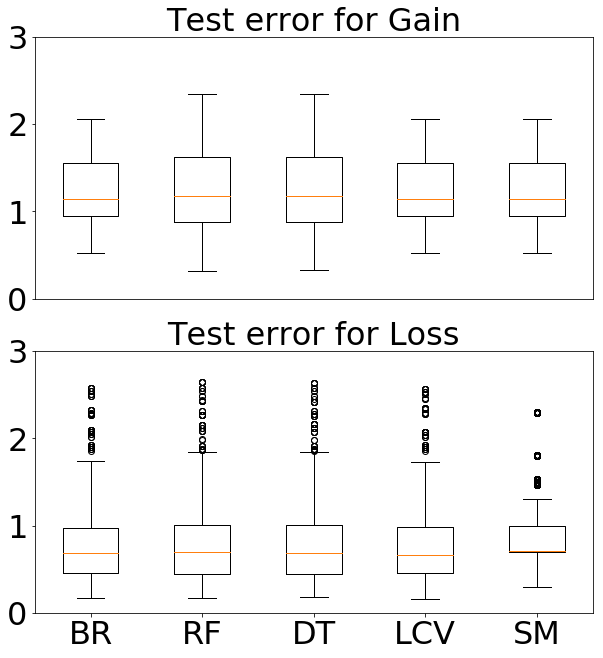

In [11]:
import numpy as np
print(sortedDict.keys())

gain = 0
print("### Gain ###")

for gainError in errorArray[0]:
    gain += np.mean(gainError)
    print("Mean: {}. Median: {}. Max: {}".format(np.mean(gainError), np.median(gainError), np.max(gainError)))

loss = 0
print("### Loss ###")

for lossError in errorArray[1]:
    loss += np.mean(lossError)
    print("Mean: {}. Median: {}. Max: {}".format(np.mean(lossError), np.median(lossError), np.max(lossError)))
    
print("Mean Total - Gain: {}. Loss: {}".format(gain / 5, loss / 5))
plotGrid(errorArray[0], errorArray[1])